In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image

## Q1-1

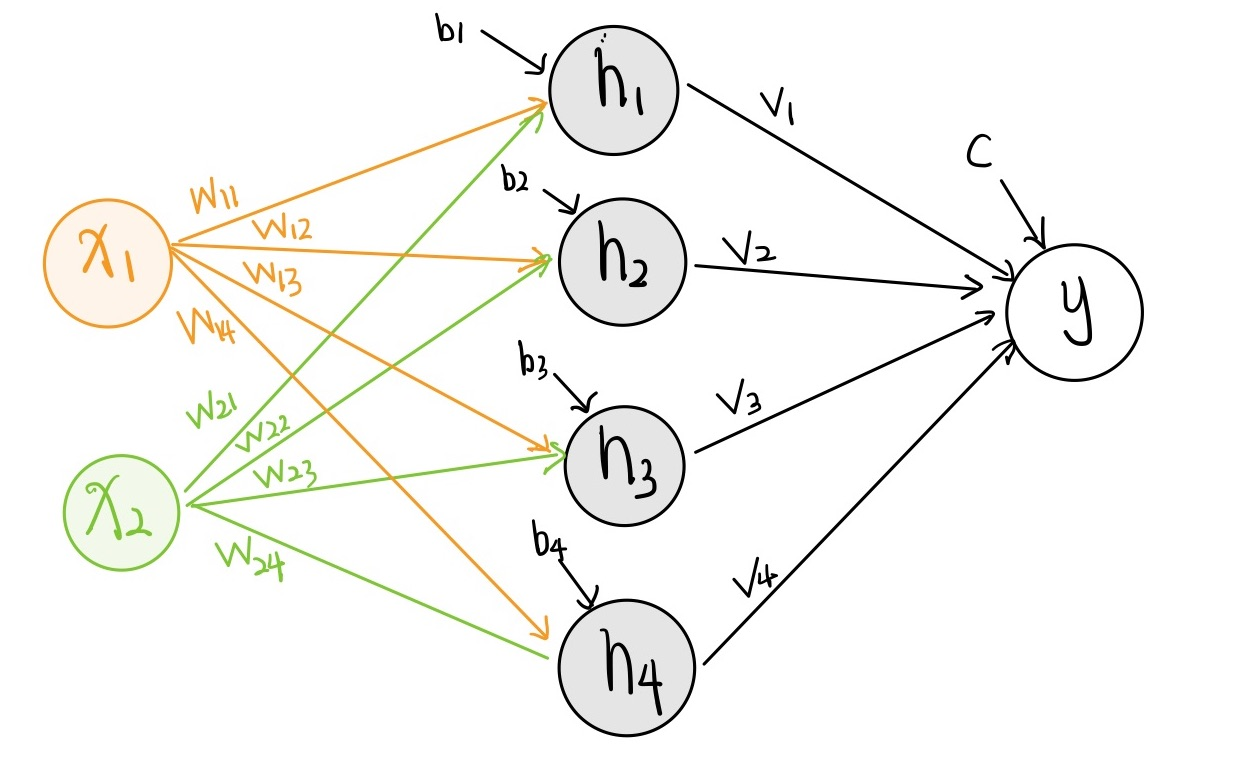

In [3]:
Image("1-1.jpg", width=500, height=500)

## Q1-2

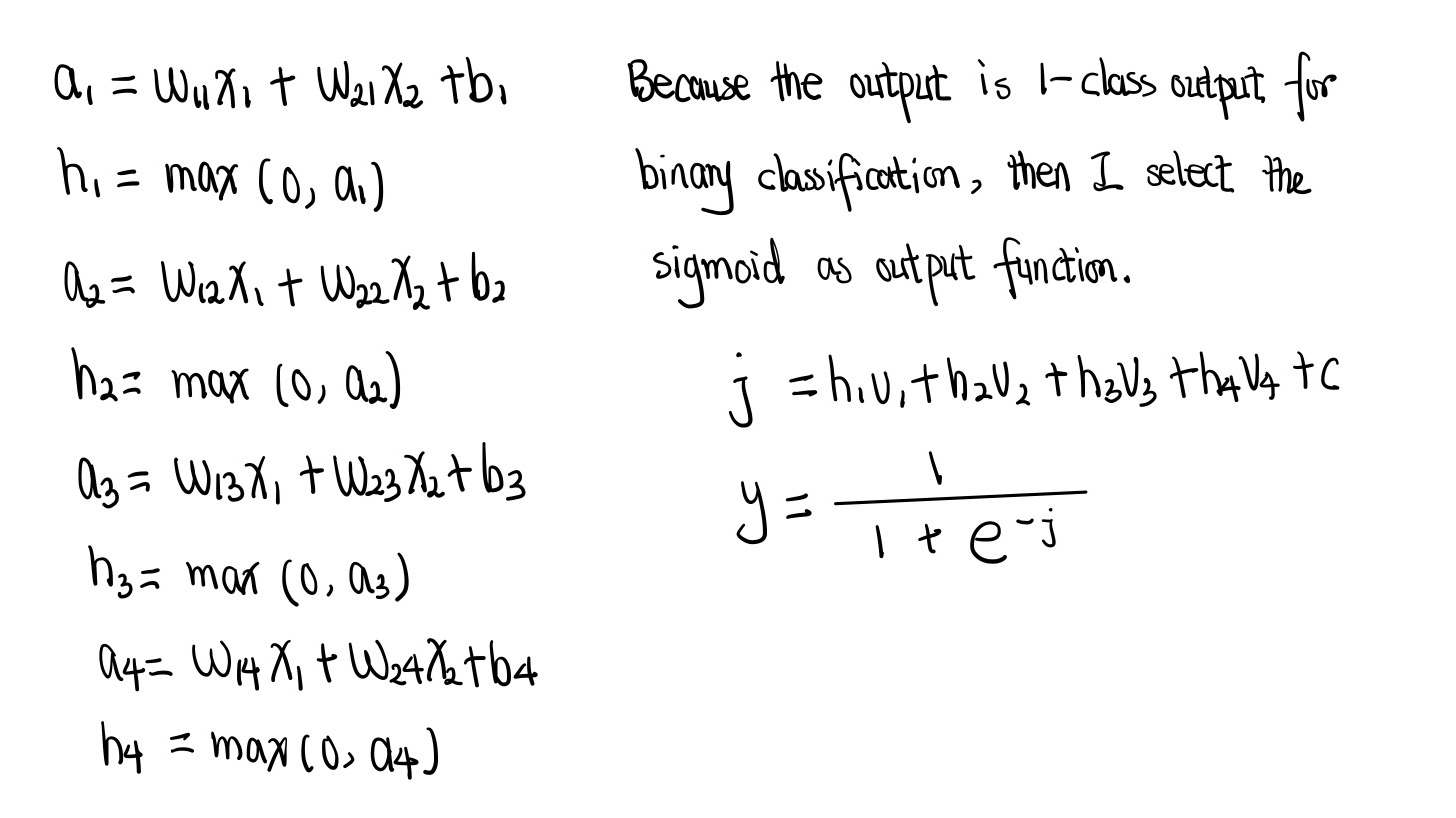

In [4]:
Image("1-2.jpg", width=500, height=500)

## Q1-3

In [5]:
def nn_layer(x, w, b, f):
    return f(x@w + b)

def ff_nn_ReLu(x, params):
    h = nn_layer(x, params[0], params[1], tf.nn.relu)
    yhat = nn_layer(h, params[2], params[3], tf.nn.sigmoid)
    return yhat

## Q1-4

In [6]:
x = np.matrix([[1, -1], [0, -1], [0,1]])
w = np.matrix([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.matrix([0, 0, 1, 0])
v = np.matrix([1, 0, -1, 1]).T
c = np.matrix([1])
yhat = ff_nn_ReLu(x, [w, b, v, c])

print("For each sample, the class probabilities are {}, {} and {}".format(yhat[0][0], yhat[1][0], yhat[2][0]))

For each sample, the class probabilities are 0.8175744761936437, 0.6224593312018546 and 0.6224593312018546


## Q2-1

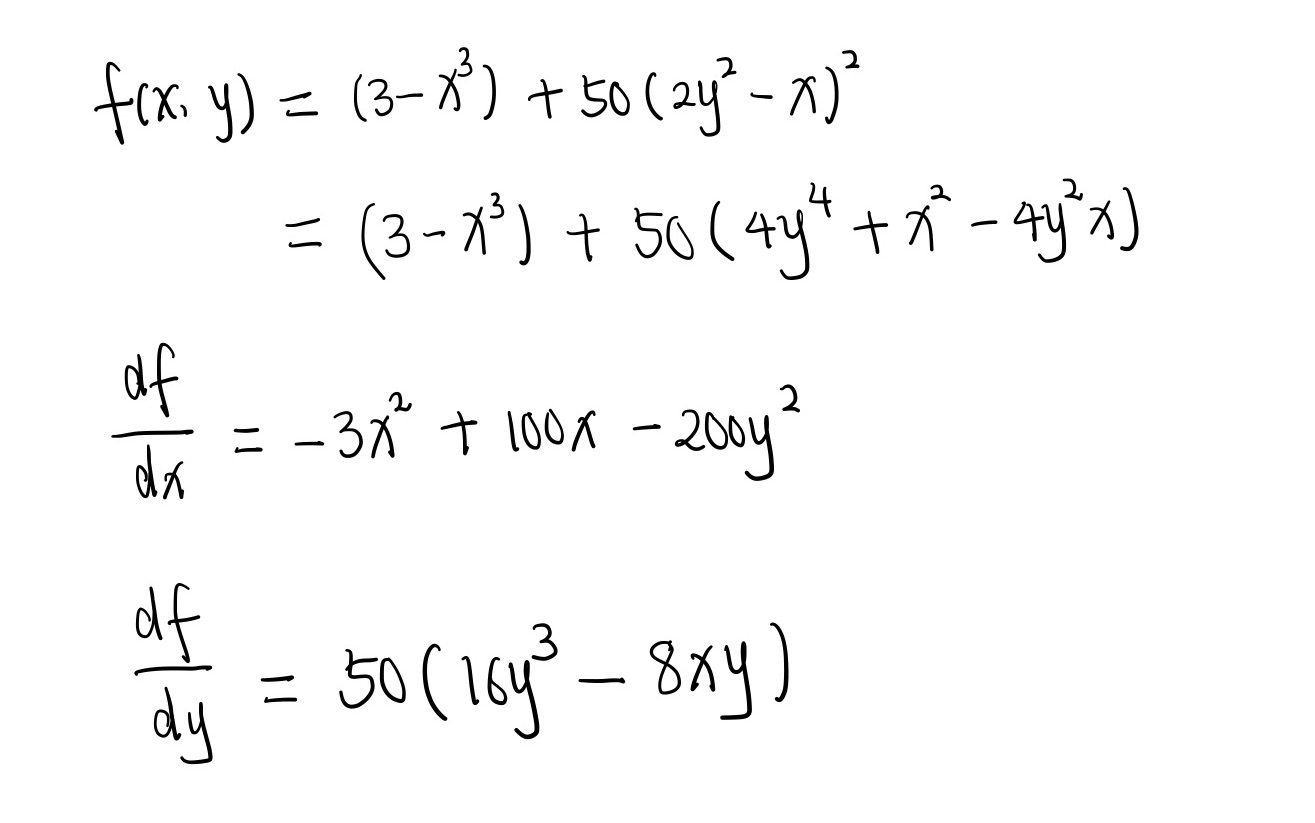

In [7]:
Image("2-1.jpg", width=300, height=300)

## Q2-2

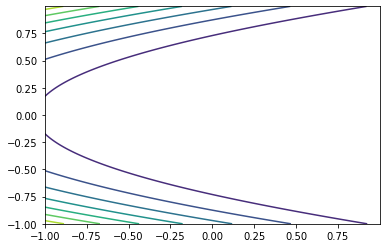

In [8]:
delta = 0.001
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## Q2-3

In [9]:
def grad_f_1(vector):
    x, y = vector
    df_dx = -3*x**2 + 100*x - 200*y**2
    df_dy = 50*(16*y**3-8*x*y)
    return np.array([df_dx, df_dy])

def grad_descent_1(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-1, 1, size = 2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f_1(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

np.random.seed(10)
iters = 10
rate = 0.001
traj = grad_descent_1(iterations=iters, learning_rate=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2
print("The minimum is {0:.4f} after {1} iterations with learning rate {2:.3f}".format(z, iters, rate))

The minimum is 2.7471 after 10 iterations with learning rate 0.001


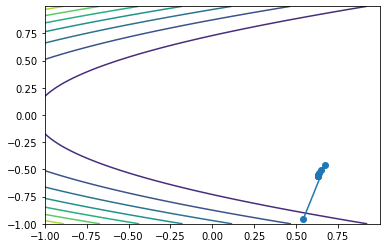

In [10]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [11]:
np.random.seed(10)
iters = 10
rate = 5e-4
traj = grad_descent_1(iterations=iters, learning_rate=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2
print("The minimum is {0:.4f} after {1} iterations with learning rate {2:.4f}".format(z, iters, rate))

The minimum is 2.7149 after 10 iterations with learning rate 0.0005


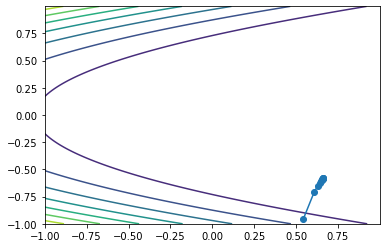

In [12]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [13]:
np.random.seed(10)
iters = 10
rate = 1e-4
traj = grad_descent_1(iterations=iters, learning_rate=rate)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2
print("The minimum is {0:.4f} after {1} iterations with learning rate {2:.4f}".format(z, iters, rate))

The minimum is 11.5388 after 10 iterations with learning rate 0.0001


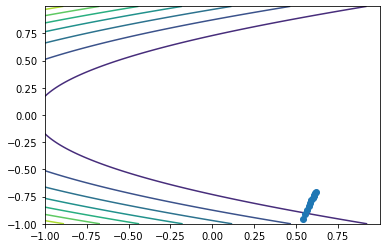

In [14]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Q2-4

In [15]:
def grad_descent_with_momentum_1(starting_point=None, iterations=10, learning_rate=10, alpha=.9):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size = 2)
    
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f_1(point)
        v = alpha * v + learning_rate * grad
        point = point - v
        trajectory.append(point)
        
    return np.array(trajectory)

np.random.seed(10)
iters = 10
rate = 5e-4
alpha = 0.1
traj = grad_descent_with_momentum_1(iterations=iters, learning_rate=rate, alpha=alpha)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2

print("The minimum is {0:.4f} after {1} iterations with learning rate {2} and hyperparameter alpha {3}".format(z, iters, rate, alpha))

The minimum is 2.7116 after 10 iterations with learning rate 0.0005 and hyperparameter alpha 0.1


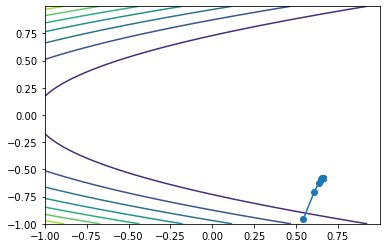

In [16]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [17]:
np.random.seed(10)
iters = 10
rate = 5e-4
alpha = 0.01
traj = grad_descent_with_momentum_1(iterations=iters, learning_rate=rate, alpha=alpha)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2

print("The minimum is {0:.4f} after {1} iterations with learning rate {2} and hyperparameter alpha {3}".format(z, iters, rate, alpha))


The minimum is 2.7140 after 10 iterations with learning rate 0.0005 and hyperparameter alpha 0.01


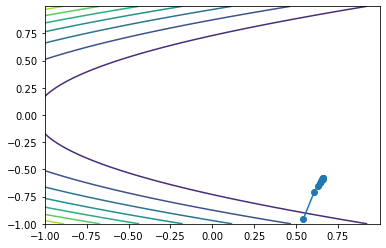

In [18]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [19]:
np.random.seed(10)
iters = 10
rate = 5e-4
alpha = 0.001
traj = grad_descent_with_momentum_1(iterations=iters, learning_rate=rate, alpha=alpha)

x = traj[iters-1][0]
y = traj[iters-1][1]
z = (3-x**3) + 50*(2*y**2 - x)**2

print("The minimum is {0:.4f} after {1} iterations with learning rate {2} and hyperparameter alpha {3}".format(z, iters, rate, alpha))


The minimum is 2.7148 after 10 iterations with learning rate 0.0005 and hyperparameter alpha 0.001


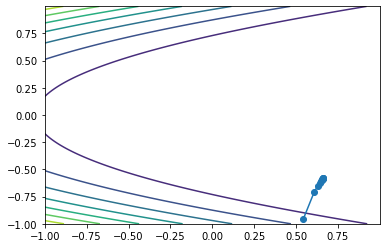

In [20]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Q3-1

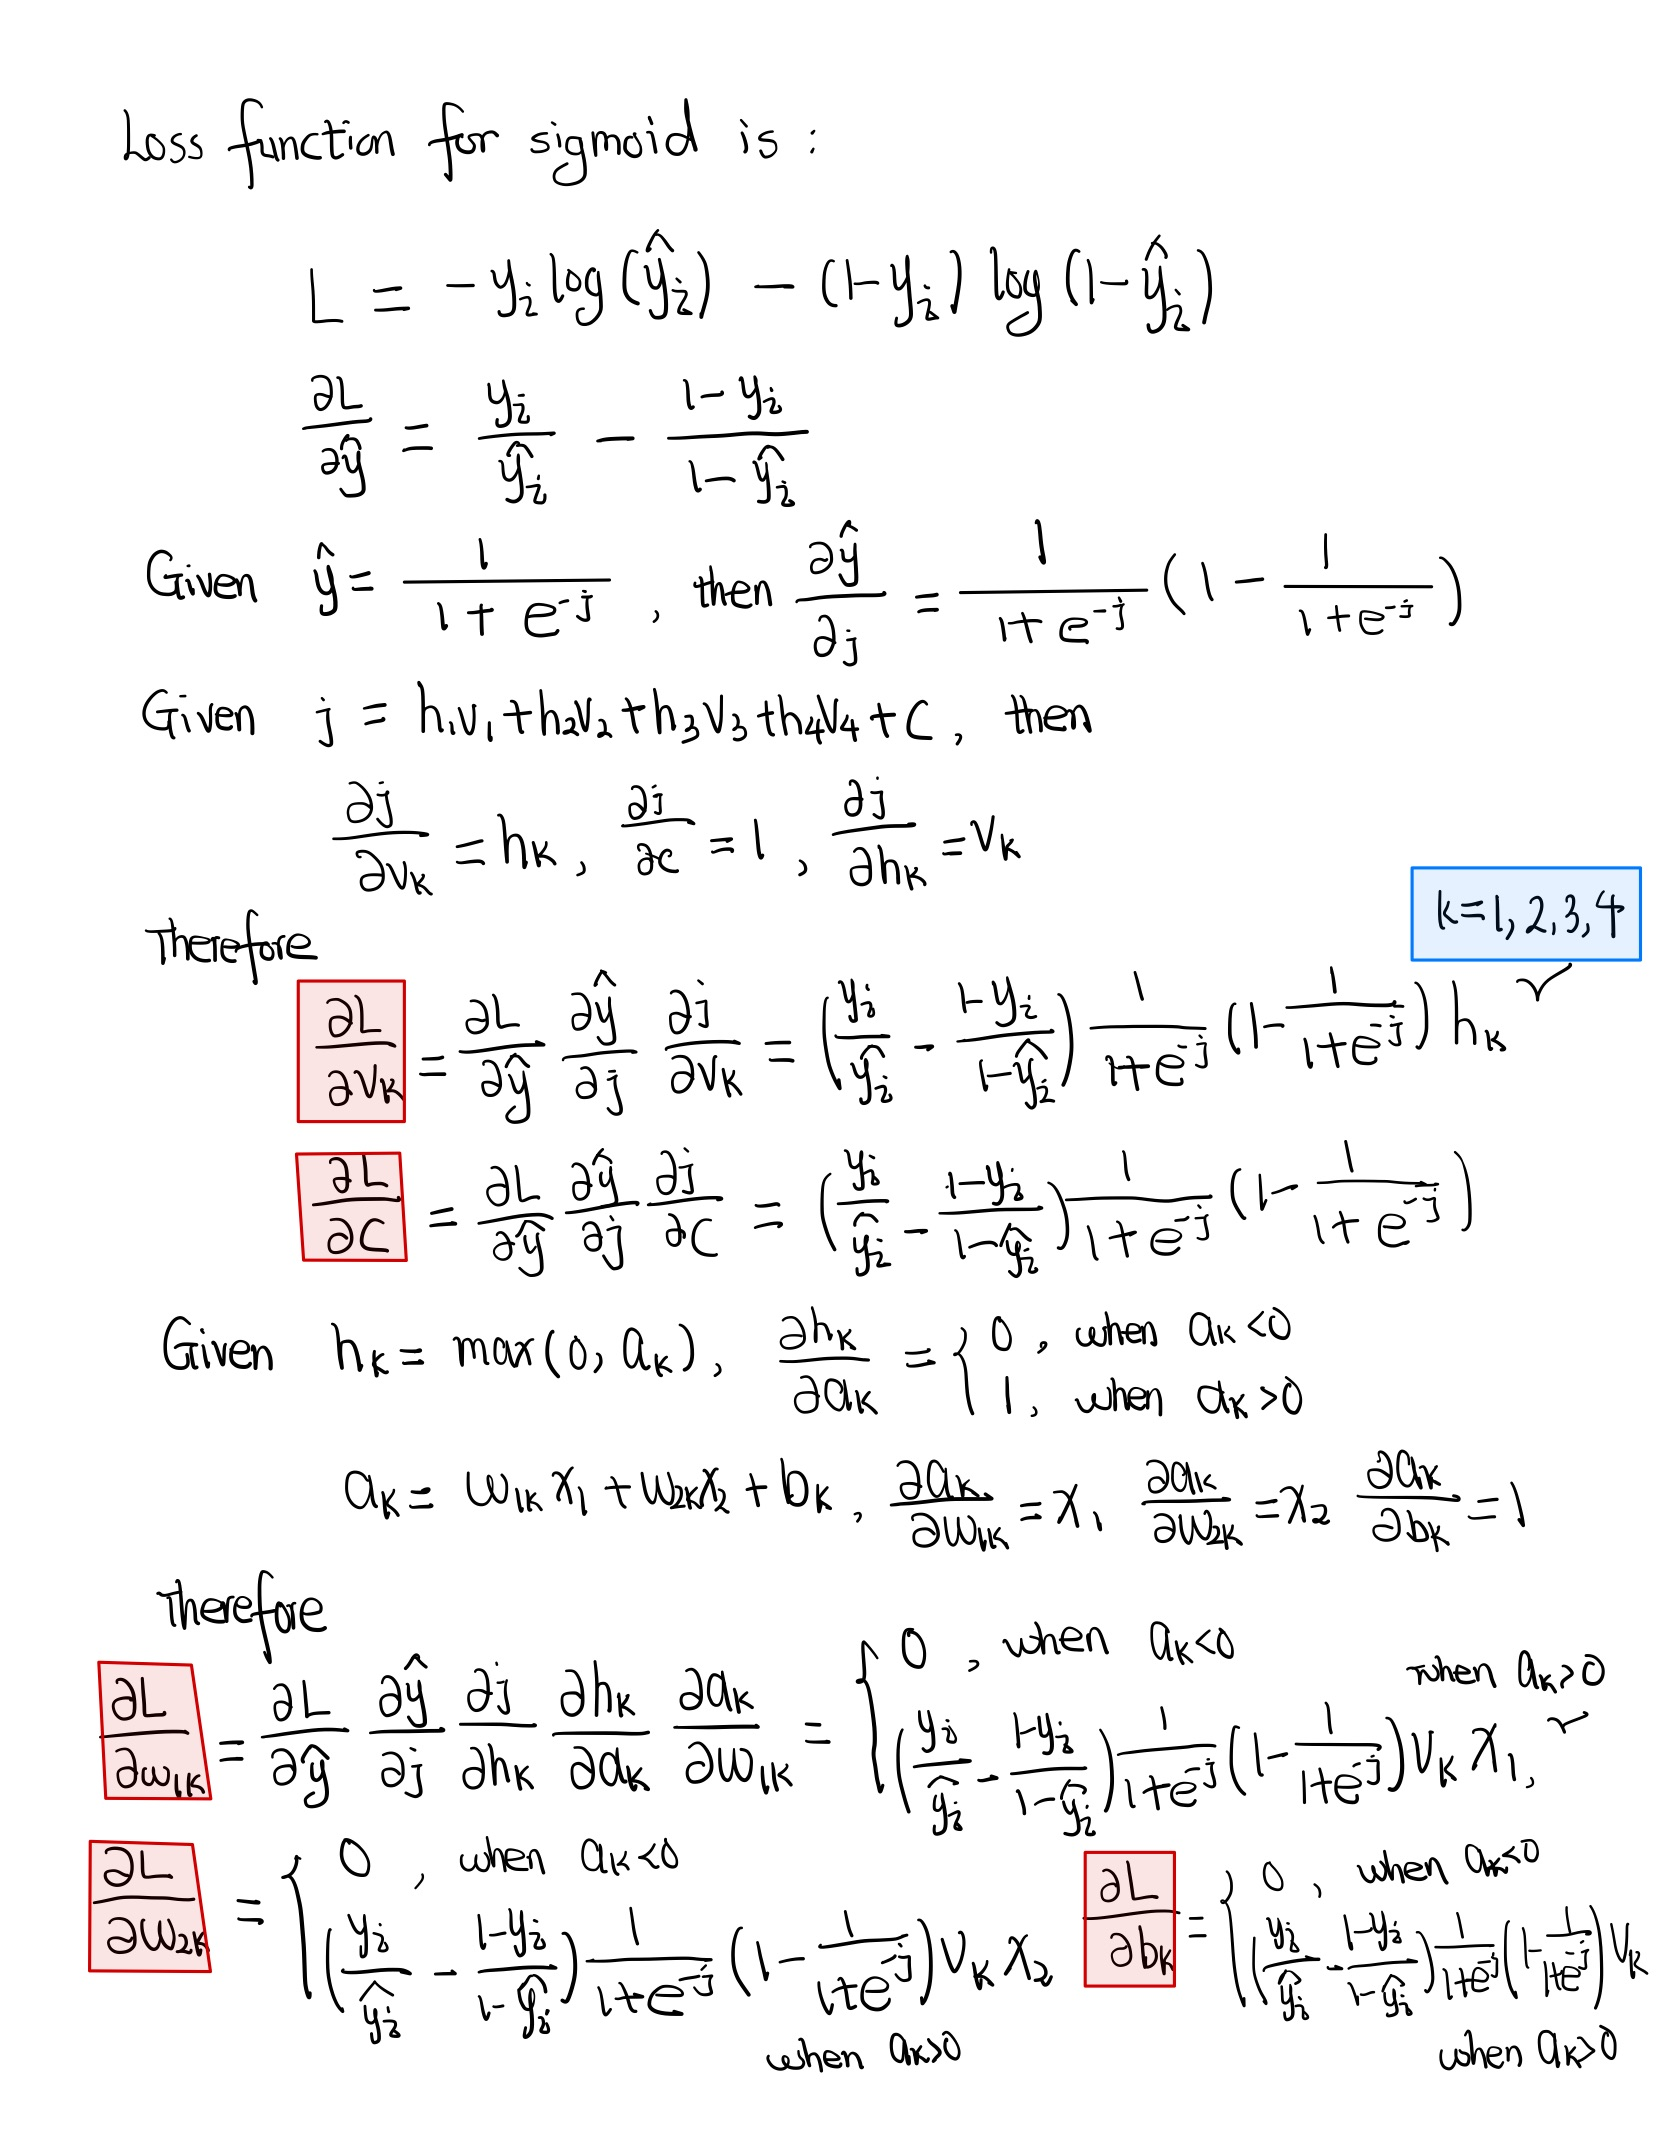

In [21]:
Image("3-1.jpg", width=500, height=1000)

## Q3-2

In [22]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11, w_12, w_13, w_14],[w_21, w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1, v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [23]:
def grad_f_2(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))


    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])
    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, dL_dw21, dL_dw22, dL_dw23, dL_dw24, dL_db1, dL_db2, dL_db3, dL_db4, dL_dv1, dL_dv2, dL_dv3, dL_dv4, dL_dc])

## Q3-3

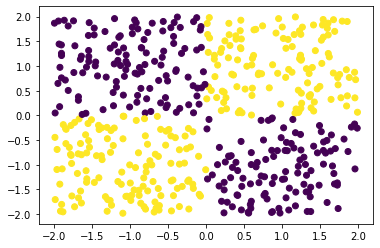

In [24]:
np.random.seed(10)
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

## Q3-4

In [ ]:
def grad_descent_1(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-1, 1, size = 2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f_1(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

In [28]:
def grad_descent_2(x, y,  iterations=10, learning_rate=1e-2):
    np.random.seed(10)
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f_2(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

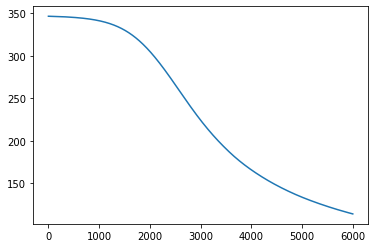

In [59]:
traj, losses = grad_descent_2(x, y, iterations=6000,learning_rate=1e-2)
plt.plot(losses)

## Q3-5

In [56]:
def grad_descent_with_momentum_2(x, y,  iterations=10, learning_rate=1e-2, alpha = 1e-2):
    np.random.seed(10)
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    v = np.zeros(point.size)
 
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f_2(point, x, y)
        v = alpha * v + learning_rate * grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

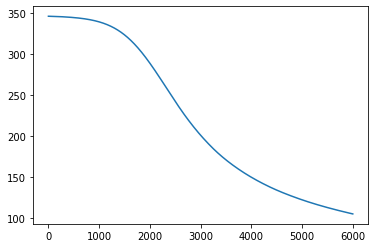

In [61]:
traj, losses = grad_descent_with_momentum_2(x, y, iterations=6000,learning_rate=1e-2, alpha = 0.1)
plt.plot(losses)

We could find that the algorithm with Momentum converge more efficiently.

## Q3-6

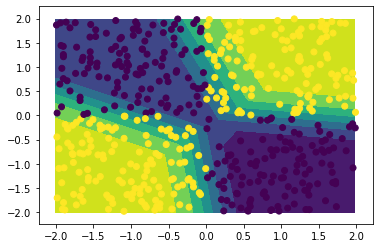

In [62]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)